# Apple Inc. analysis

## Adjusted closing price

Adjusted closing price amends a stock's closing price to accurately reflect that stock's value after accounting for any corporate actions. It is considered to be the true price of that stock and is often used when examining historical returns or performing a detailed analysis of historical returns. More: https://www.investopedia.com/terms/a/adjusted_closing_price.asp

In [1]:
from plot_utilities import cdfplot
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
from pandas.plotting import scatter_matrix
from plot_utilities import matplotlib_nikita_style
matplotlib_nikita_style()

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'CDF of adjusted closing price')

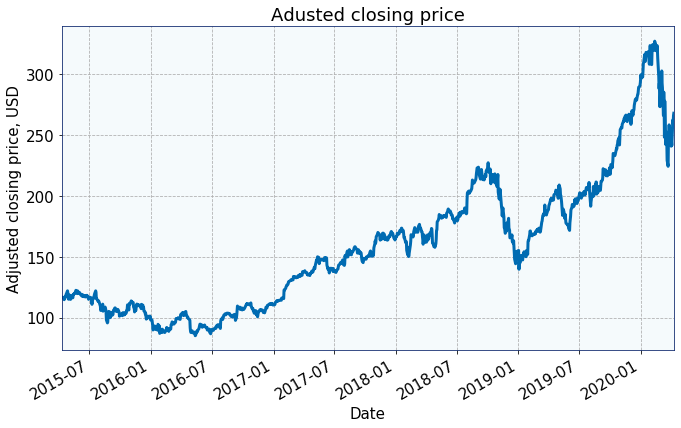

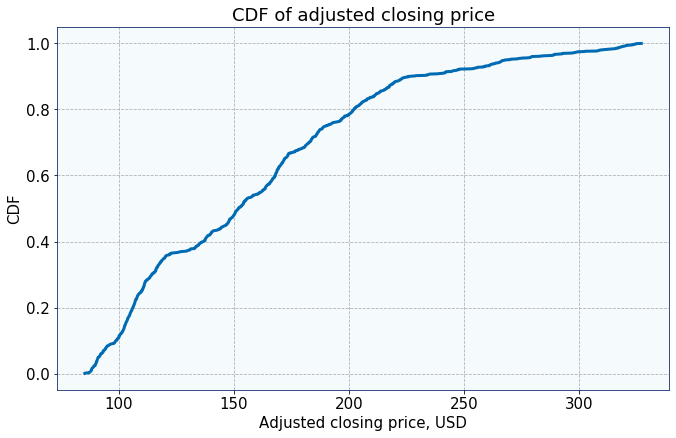

In [2]:
# Data fetching for the AAPL stock
data = yf.download('AAPL', period="5y")

# Adjusted closing price
daily_close = data['Adj Close']

# Plot the adusted closing price
daily_close.plot()
plt.ylabel('Adjusted closing price, USD')
plt.xlabel('Date')
plt.title('Adusted closing price')

# CDF plot
daily_close_np = daily_close.to_numpy()
daily_close_np = daily_close_np.reshape([daily_close_np.shape[0],])
plt.figure()
X, Y = cdfplot(daily_close_np)
plt.plot(X, Y)
plt.ylabel("CDF")
plt.xlabel("Adjusted closing price, USD")
plt.title('CDF of adjusted closing price')

## Moving average

Text(0.5, 1.0, 'Moving average')

<Figure size 720x432 with 0 Axes>

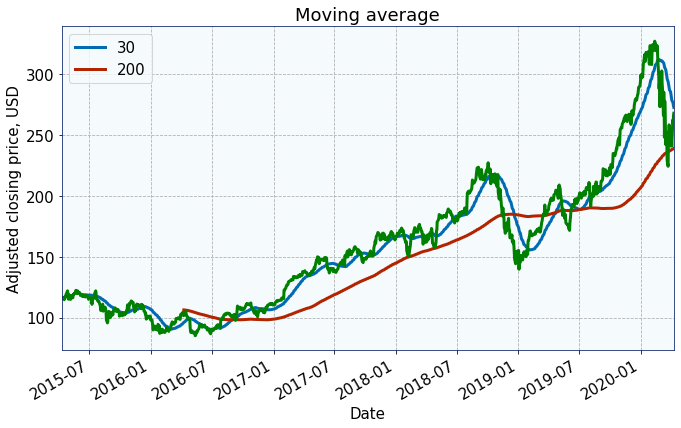

In [3]:
# Moving average
plt.figure()
moving_avg = pd.DataFrame()
moving_avg['30'] = daily_close.rolling(window=40).mean()
moving_avg['200'] = daily_close.rolling(window=252).mean()
moving_avg.plot()
data['Adj Close'].plot()
plt.ylabel('Adjusted closing price, USD')
plt.xlabel('Date')
plt.title('Moving average')

## Daily return
The return over a single period of any length of time is:
$$r={\frac {V_{f}-V_{i}}{V_{i}}}$$

where:

$V_{f} - \text{final value, including dividends and interest}$

$V_{i} - \text{initial value}$

## Cumulative return
A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the period of time involved. The cumulative return can be calculated as follows:

$$R_i = (1+r_i)R_{i-1},$$

where $R_i$ is cumulative return and $r_i$ is daily return.

count    1259.000000
mean        0.000821
std         0.017989
min        -0.128647
25%        -0.006013
50%         0.000596
75%         0.009167
max         0.119808
Name: Adj Close, dtype: float64


Text(0.5, 1.0, 'Cumulative return')

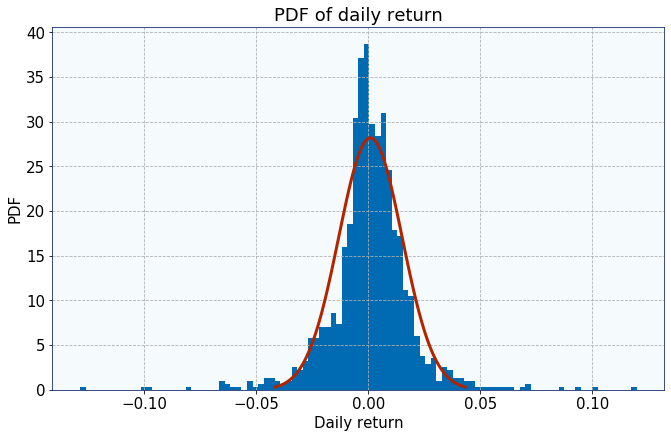

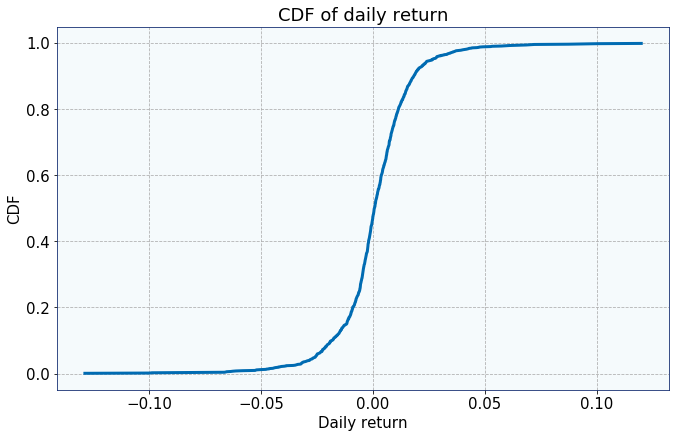

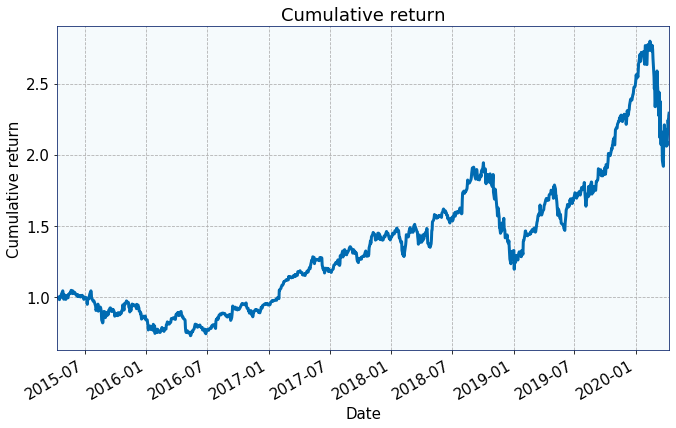

In [4]:
# Daily return
daily_pct_change = daily_close.pct_change()

print(daily_pct_change.describe())

# Daily log return
daily_log_returns = np.log(daily_close.pct_change()+1)

# PDF of daily return
plt.figure()
daily_pct_change.hist(bins=100, density=1)
plt.ylabel('PDF')
plt.xlabel('Daily return')
plt.title('PDF of daily return')

# Fictional line
mu = 0.000984
variance = 0.0002
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

# CDF
daily_pct_change_np = daily_pct_change.to_numpy()
daily_pct_change_np = daily_pct_change_np.reshape([daily_pct_change_np.shape[0],])
plt.figure()
X, Y = cdfplot(daily_pct_change_np)
plt.plot(X, Y)
plt.ylabel("CDF")
plt.xlabel("Daily return")
plt.title('CDF of daily return')

# Cumulative return
cum_daily_return = (1 + (daily_pct_change)).cumprod()
plt.figure()
cum_daily_return.plot()
plt.ylabel('Cumulative return')
plt.xlabel('Date')
plt.title('Cumulative return')

Text(0.5, 1.0, 'CDF of monthly return')

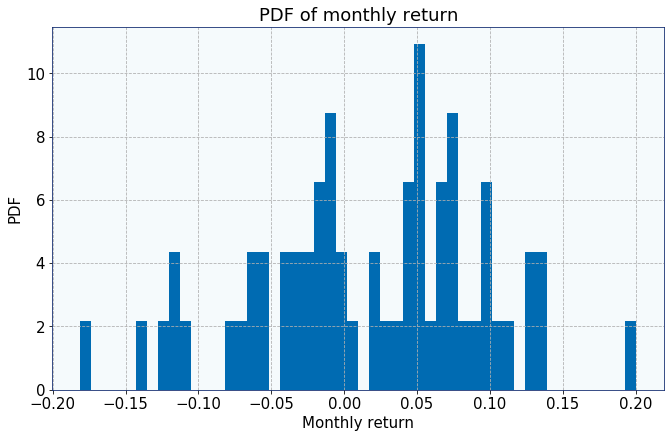

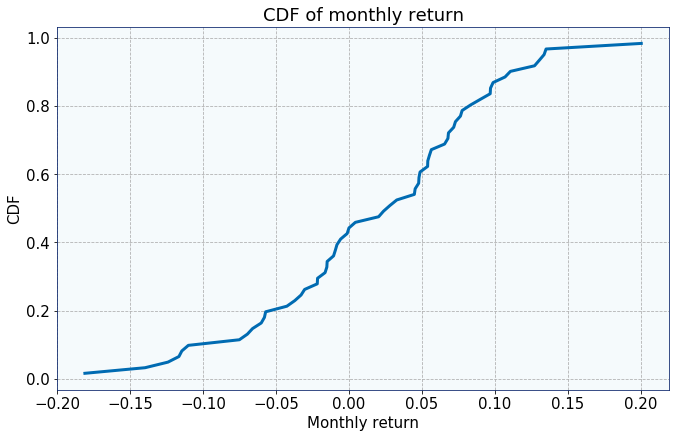

In [5]:
# By month
monthly = data.resample('BM').apply(lambda x: x[-1])

# Monthly return
monthly_pct_change = monthly['Adj Close'].pct_change()

# PDF
monthly_pct_change.hist(bins=50, density=1)
plt.ylabel('PDF')
plt.xlabel('Monthly return')
plt.title('PDF of monthly return')

# CDF
monthly_pct_change_np = monthly_pct_change.to_numpy()
monthly_pct_change_np = monthly_pct_change_np.reshape([monthly_pct_change_np.shape[0],])
plt.figure()
X, Y = cdfplot(monthly_pct_change_np)
plt.plot(X, Y)
plt.ylabel("CDF")
plt.xlabel("Monthly return")
plt.title('CDF of monthly return')

Text(0.5, 1.0, 'CDF of quarter return')

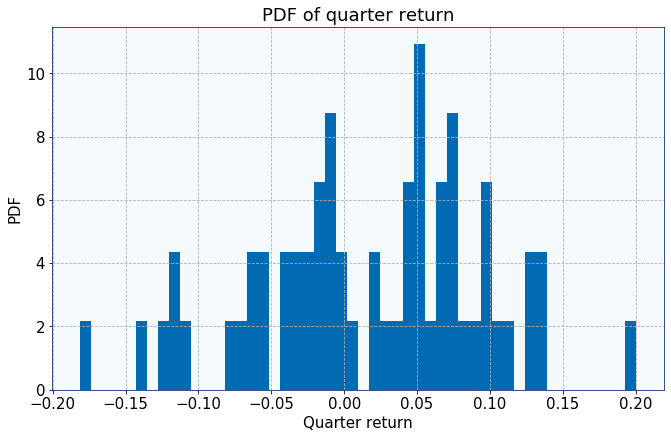

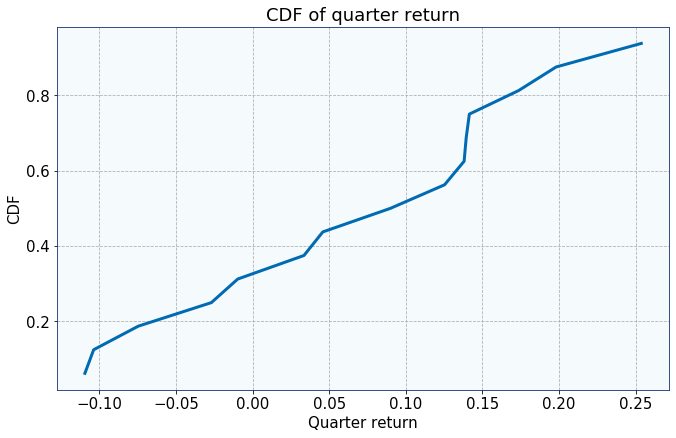

In [6]:
# Quarter mean
quarter = data.resample("4M").mean()

# Quarter return
quarter_pct_change = quarter['Adj Close'].pct_change()

# PDF
monthly_pct_change.hist(bins=50, density=1)
plt.ylabel('PDF')
plt.xlabel('Quarter return')
plt.title('PDF of quarter return')

# CDF
quarter_pct_change_np = quarter_pct_change.to_numpy()
quarter_pct_change_np = quarter_pct_change_np.reshape([quarter_pct_change_np.shape[0],])
plt.figure()
X, Y = cdfplot(quarter_pct_change_np)
plt.plot(X, Y)
plt.ylabel("CDF")
plt.xlabel("Quarter return")
plt.title('CDF of quarter return')

## Stocks comparison

[*********************100%***********************]  4 of 4 completed


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a272e9518>,
      dtype=object)

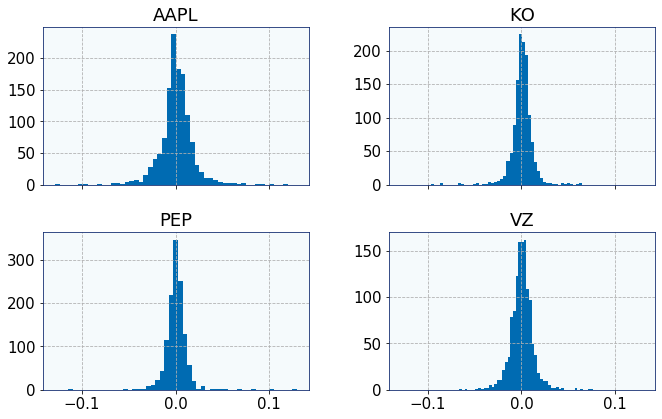

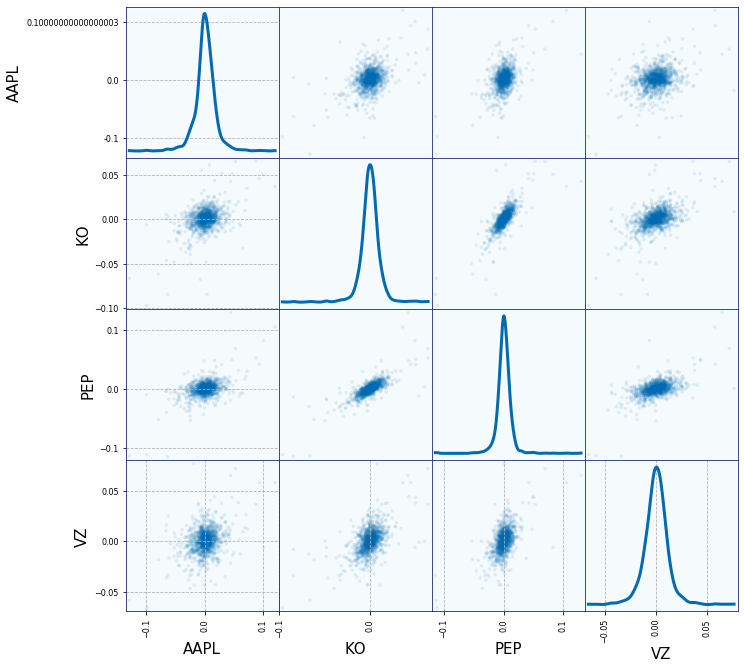

In [7]:
tickers = ['AAPL', 'VZ', 'KO', 'PEP']

stock = yf.download(tickers, period="5y")

daily_pct_change = stock['Adj Close'].pct_change()
daily_pct_change.hist(bins=50, sharex=True)

scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(10,10))

## Volatility

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is measured as either the standard deviation or variance between returns from that same security or market index:

$$ V = \sigma_r \sqrt T$$

where:

$\sigma_r  = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}- \text{standard deviation,} x_i  - \text{daily return}$

$T - \text{time period}$

More: https://www.investopedia.com/terms/v/volatility.asp

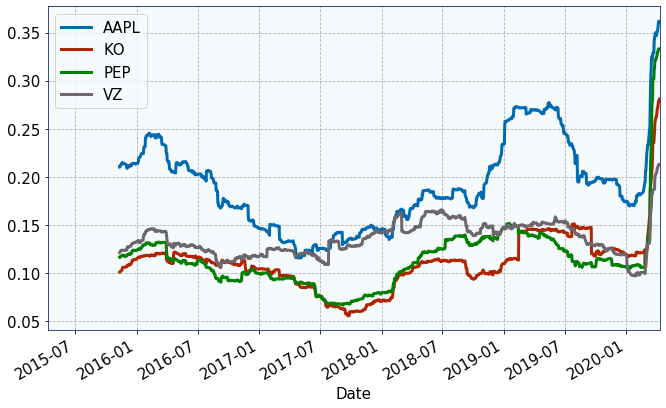

In [9]:
# Volatility
time_period = 150 
volatility = daily_pct_change.rolling(time_period).std() * np.sqrt(time_period) 
volatility.plot()